This notebook sets up the workflow for the various functions we have implemented. It shows an example of how we clustered using Nonnegative Matrix Factorization. We manually inspect the output of NMF to determine the best number of clusters for each group. Then, we create word clouds for specific groups and demographic splits.

## Imports and Settings

In [1]:
import random
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from utils.clean_up import *
from utils.categorize_demographics import *
from utils.nonnegative_matrix_factorization import nmf_inspect, nmf_labels

warnings.filterwarnings('ignore')
%matplotlib inline

/Users/JS/.virtualenvs/test/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
mpl.rc('savefig', dpi=300)
params = {'figure.dpi' : 300,
          'axes.axisbelow' : True,
          'lines.antialiased' : True}

for (k, v) in params.items():
    plt.rcParams[k] = v

In [3]:
essay_dict = {'essay0' : 'My self summary',
              'essay1' : 'What I\'m doing with my life',
              'essay2' : 'I\'m really good at',
              'essay3' : 'The first thing people notice about me',
              'essay4' : 'Favorite books, movies, tv, food',
              'essay5' : 'The six things I could never do without',
              'essay6' : 'I spend a lot of time thinking about',
              'essay7' : 'On a typical Friday night I am',
              'essay8' : 'The most private thing I am willing to admit',
              'essay9' : 'You should message me if'}

## Functions

In [13]:
def yellow(word, font_size, position, orientation, random_state=None, **kwargs):
    RGB = tuple([round(c * 255) for c in mpl.colors.colorConverter.to_rgb('#ffd966')])
    return 'rgb'+str(RGB)

def cyan(word, font_size, position, orientation, random_state=None, **kwargs):
    RGB = tuple([round(c * 255) for c in mpl.colors.colorConverter.to_rgb('#64ffda')])
    return 'rgb'+str(RGB)

In [5]:
def wcloud(split0, split1, vocabulary, n, color, fname=None):
    print(count_0.shape, count_1.shape)

    blah = pd.DataFrame({'0' : np.array(split0.sum(axis=0))[0],
                         '1' : np.array(split1.sum(axis=0))[0],
                         'vocab' : vocabulary})

    blah['0'] = blah['0'] / blah['0'].sum()
    blah['1'] = blah['1'] / blah['1'].sum()

    blah['diff'] = blah['0'] - blah['1']

    blah.sort('diff', ascending=False, inplace=True)
    blah.reset_index(drop=True, inplace=True)

    blah_top = blah[:n].copy()
    blah_top['diff'] = np.round(np.abs(blah_top['diff']) * 10000, 0)
    v = blah_top['vocab'].tolist()
    c = blah_top['diff'].tolist()
    wf = list(zip(v, c))

    wc = WordCloud(background_color=None, mode='RGBA',
                   width=2400, height=1600, relative_scaling=0.5,
                   font_path='/Library/Fonts/Futura.ttc')
    wc.generate_from_frequencies(wf)
    plt.figure()
    plt.imshow(wc.recolor(color_func=color, random_state=42))
    plt.axis("off")
    if fname is None:
        pass
    else:
        plt.savefig(fname, dpi=300, transparent=True)

## Essay 4

### Data

In [6]:
df = pd.read_csv('data/profiles.20120630.csv')

essay_list = ['essay4']
df_clean = clean_up(df, essay_list)
df_clean.fillna('', inplace=True)

df_clean['religion'] = df_clean['religion'].apply(religion_categories)
df_clean['job'] = df_clean['job'].apply(job_categories)
df_clean['drugs'] = df_clean['drugs'].apply(drug_categories)
df_clean['diet'] = df_clean['diet'].apply(diet_categories)
df_clean['body_type'] = df_clean['body_type'].apply(body_categories)
df_clean['drinks'] = df_clean['drinks'].apply(drink_categories)
df_clean['sign'] = df_clean['sign'].apply(sign_categories)
df_clean['ethnicity'] = df_clean['ethnicity'].apply(ethnicity_categories)
df_clean['pets'] = df_clean['pets'].apply(pets_categories)
df_clean['speaks'] = df_clean['speaks'].apply(language_categories)

In [7]:
count_matrix, tfidf_matrix, vocab = col_to_data_matrix(df_clean, essay_list[0])

In [8]:
K = 25
df_clean['group'] = nmf_labels(tfidf_matrix, k=K)

In [9]:
df_clean['sex'] = df_clean['sex'].apply(lambda x: str.upper(x))
df_clean['gender_orientation'] = df_clean[['sex','orientation']].apply(lambda x: ' '.join(x), axis=1)

### Word Clouds

In [10]:
n = 100

#### Group 1

Comedy TV shows.

(2314, 1396) (45791, 1396)


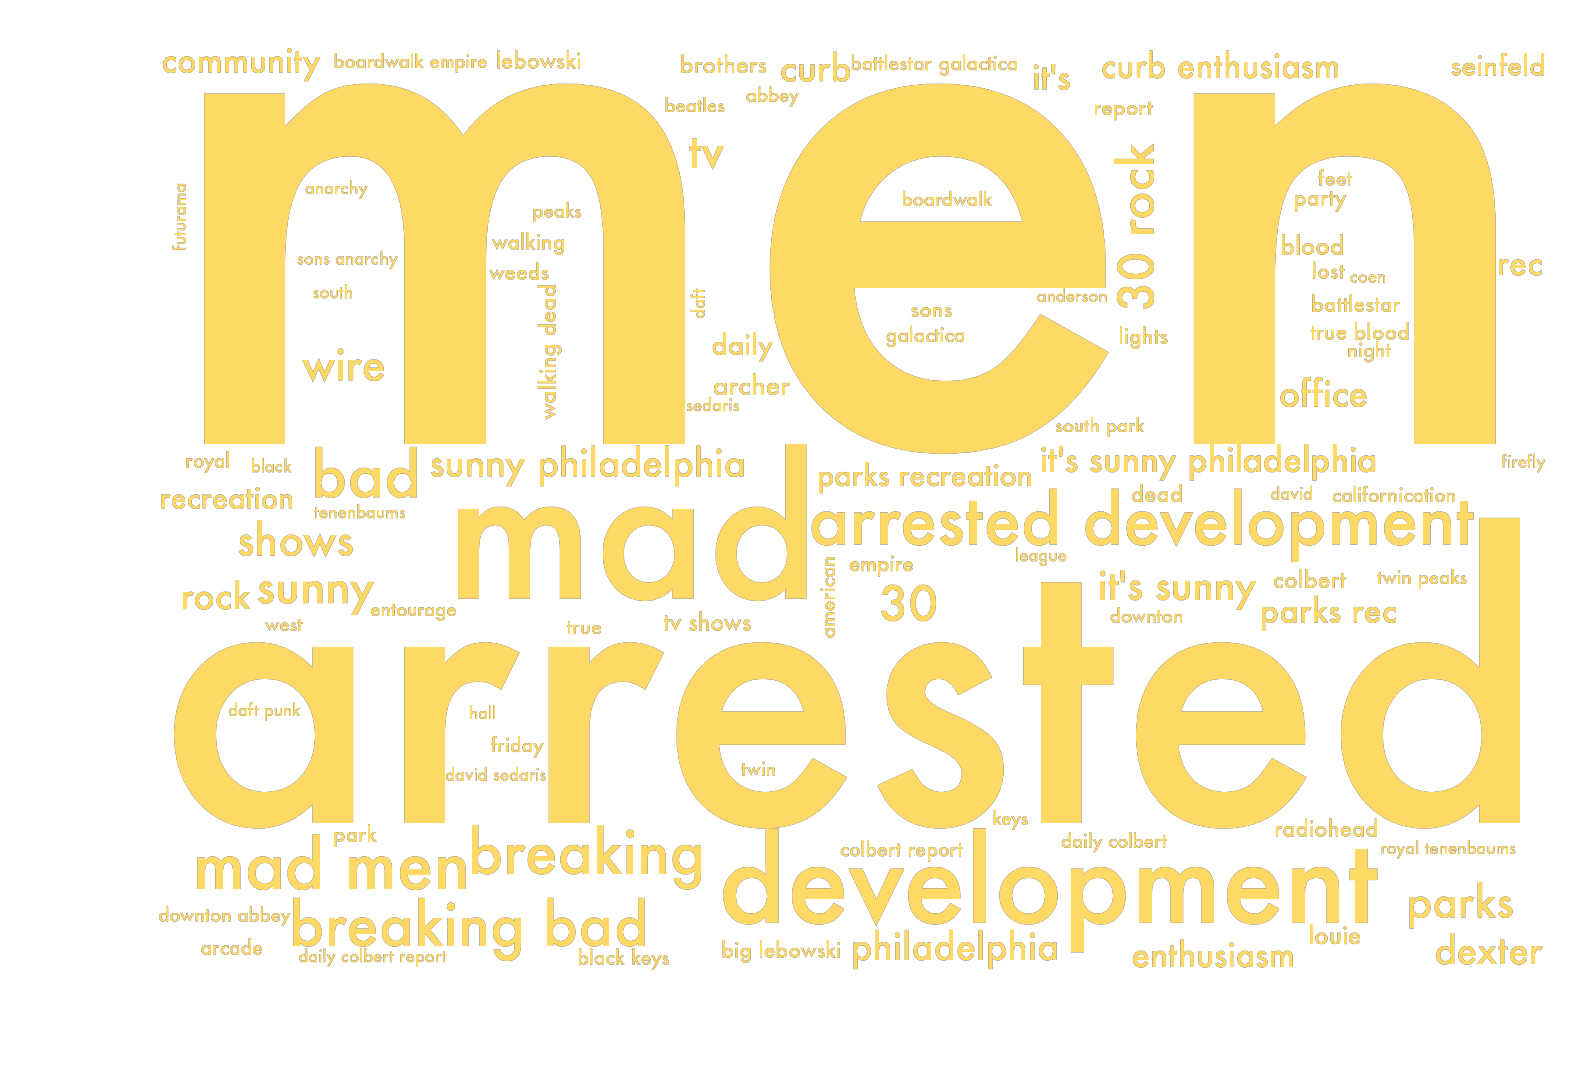

In [11]:
count_0 = count_matrix[np.array(df_clean.group==1), :]
count_1 = count_matrix[np.array(df_clean.group!=1), :]

wcloud(count_0, count_1, vocab, n, yellow, '/Users/JS/Desktop/group1.png')

#### Group 8

Food group.

(2846, 1396) (45259, 1396)


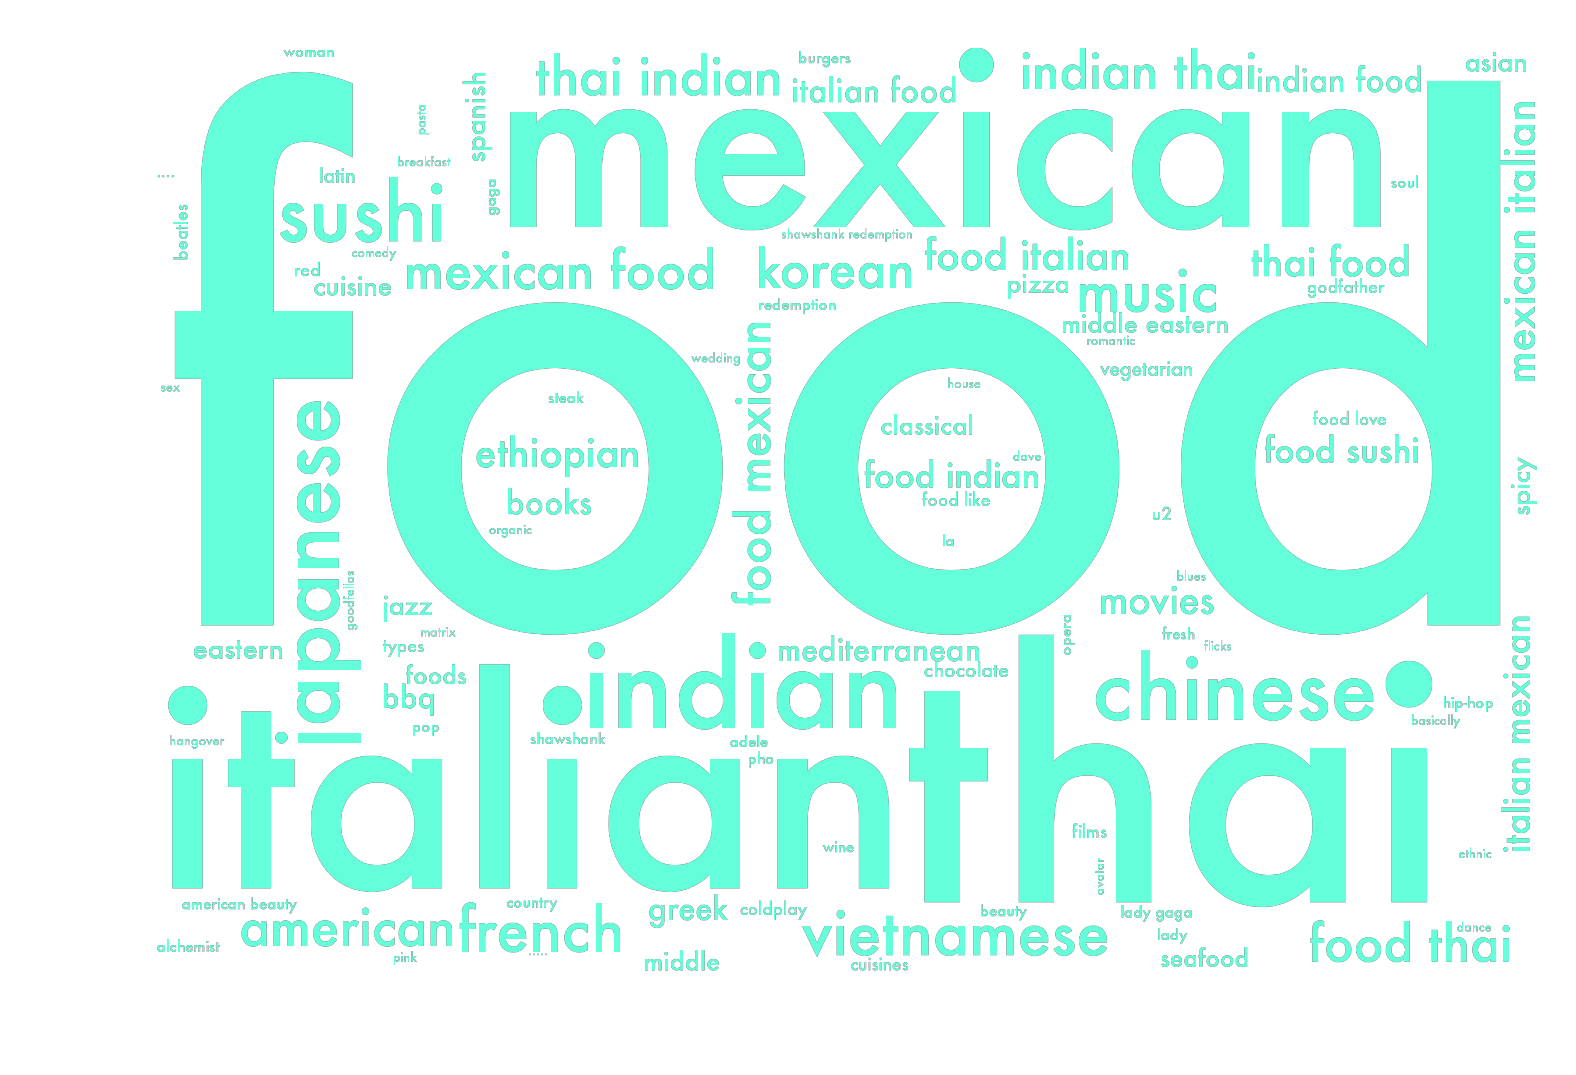

In [14]:
count_0 = count_matrix[np.array(df_clean.group==8), :]
count_1 = count_matrix[np.array(df_clean.group!=8), :]

wcloud(count_0, count_1, vocab, n, cyan, '/Users/JS/Desktop/group8.png')

#### Group 15

"Epic" movies.

(1702, 1396) (46403, 1396)


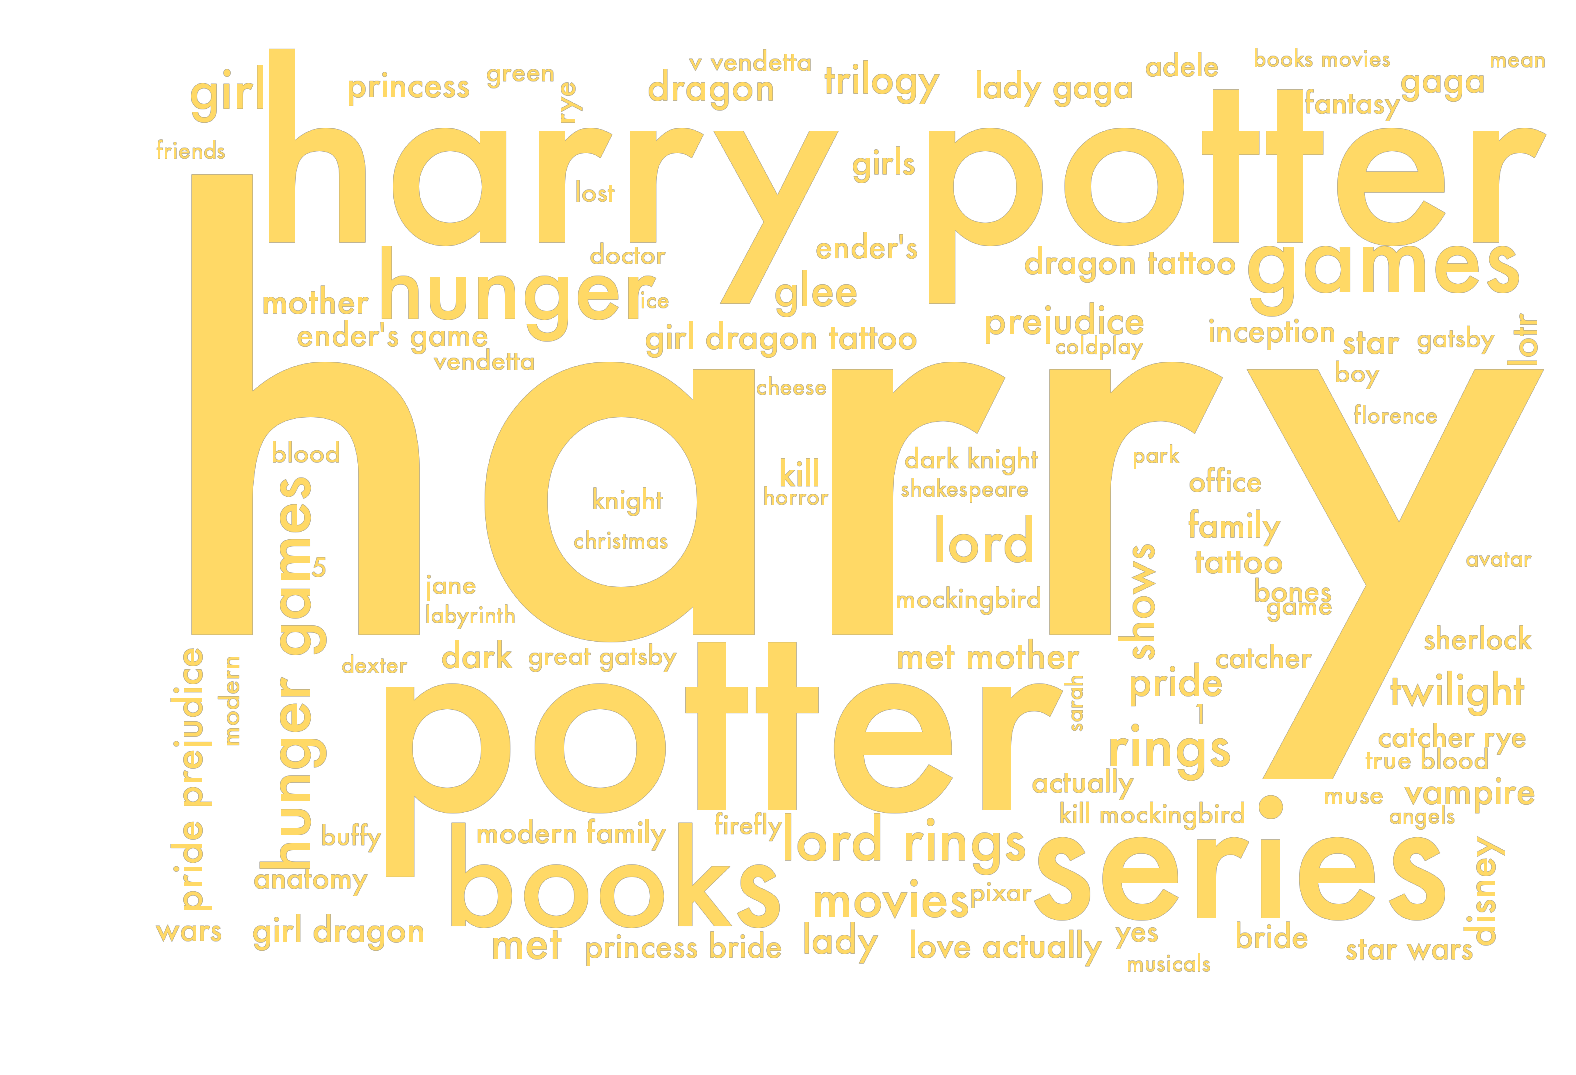

In [15]:
count_0 = count_matrix[np.array(df_clean.group==15), :]
count_1 = count_matrix[np.array(df_clean.group!=15), :]

wcloud(count_0, count_1, vocab, n, yellow, '/Users/JS/Desktop/group15.png')

#### Group 22

Rock, classic rock.

(3785, 1396) (44320, 1396)


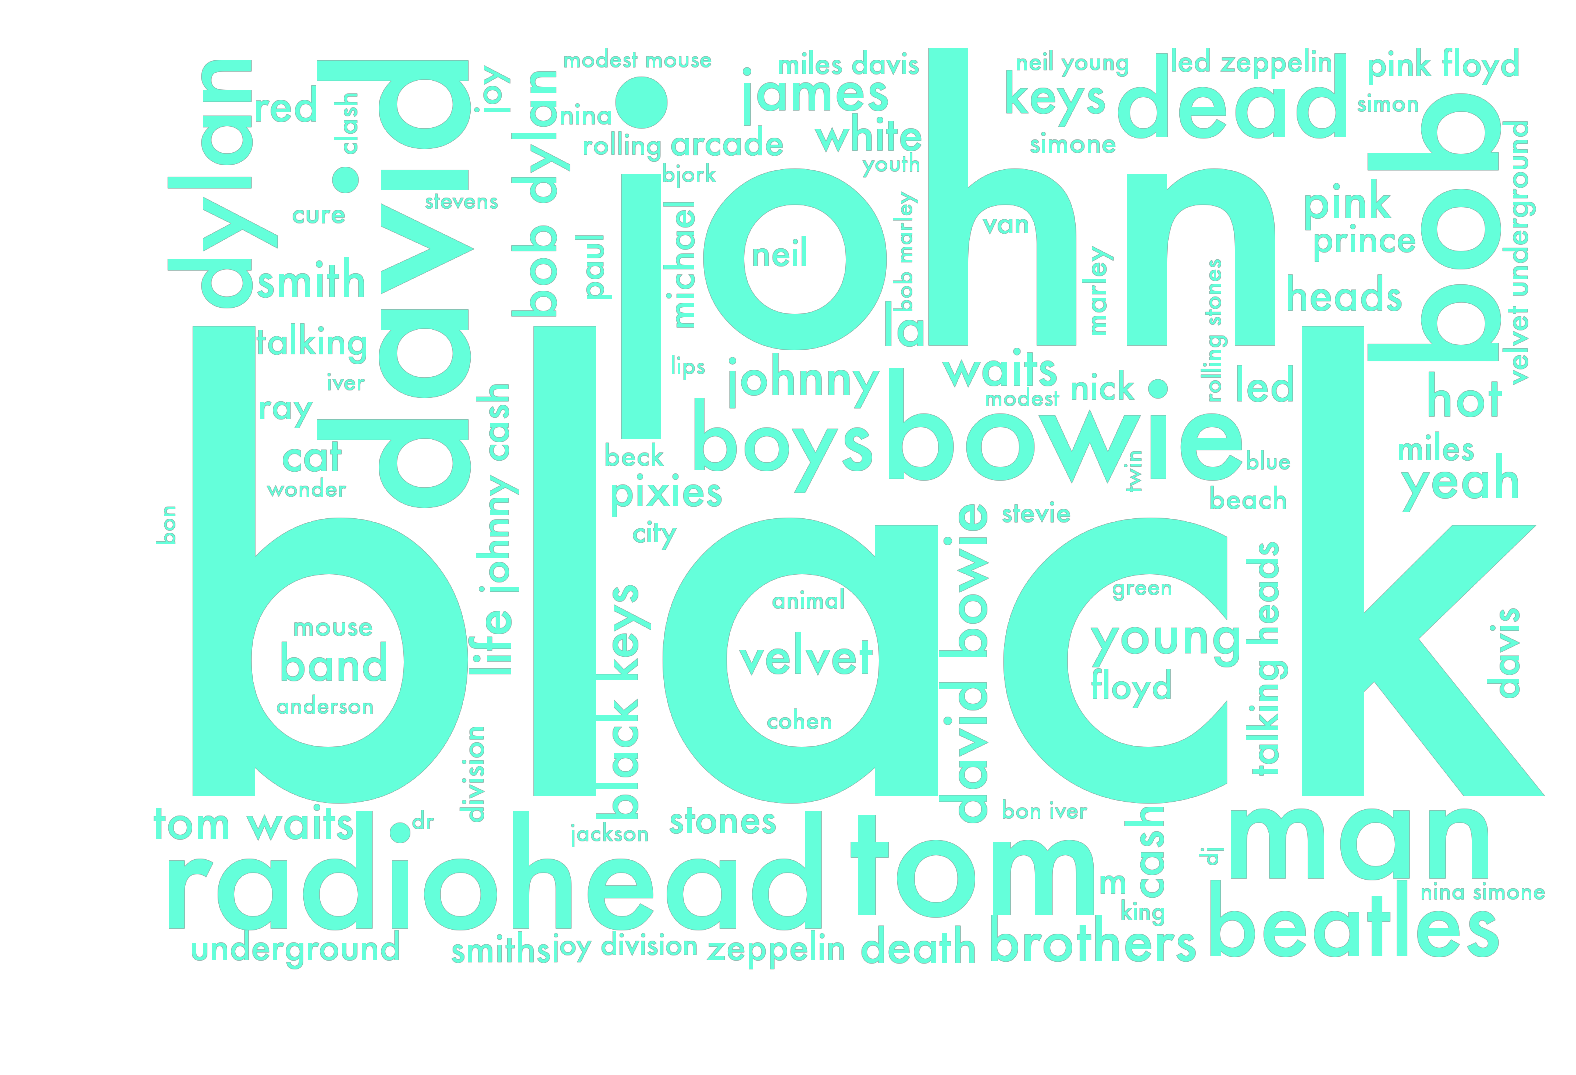

In [16]:
count_0 = count_matrix[np.array(df_clean.group==22), :]
count_1 = count_matrix[np.array(df_clean.group!=22), :]

wcloud(count_0, count_1, vocab, n, cyan, '/Users/JS/Desktop/group22.png')